<a href="https://colab.research.google.com/github/andersonjhones/An-lise-de-dados/blob/main/cl_bayesiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/BreastCancer.csv', header=(0))
#data = pd.read_csv('data/Iris.csv', header=(0))
#data = pd.read_csv('data/Vehicle.csv', header=(0))
data = pd.read_excel('/content/drive/MyDrive/wine data/wine/wiwi.xlsx', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 178  colunas:  14


,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Versicolor
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Versicolor
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Versicolor
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Versicolor
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Versicolor
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,Versicolor
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,Versicolor
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,Versicolor
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,Versicolor
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,Versicolor


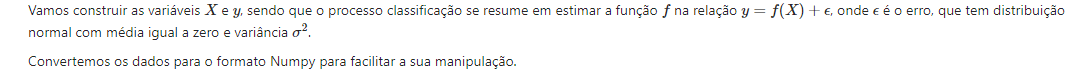

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


In [ ]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16 -1.49692992e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.



In [ ]:
from sklearn.model_selection import train_test_split
p = 0.7 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

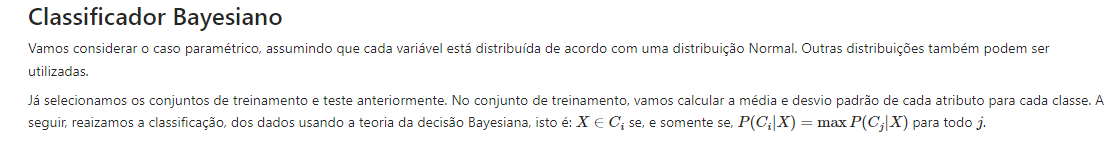

In [ ]:
from scipy.stats import multivariate_normal

#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]


In [ ]:
y_pred = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
print(y_pred)

['Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Virginica' 'Virginica' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Setosa' 'Versicolor' 'Virginica'
 'Virginica' 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Virginica'
 'Setosa' 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa']


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9814814814814815


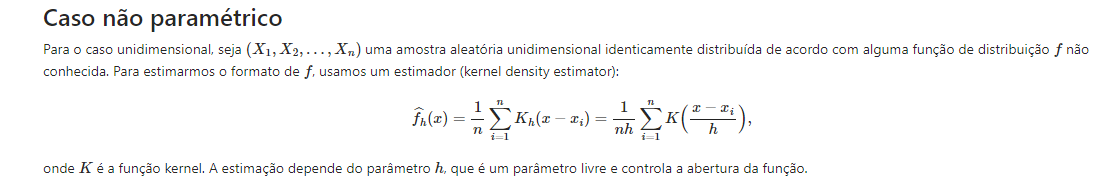

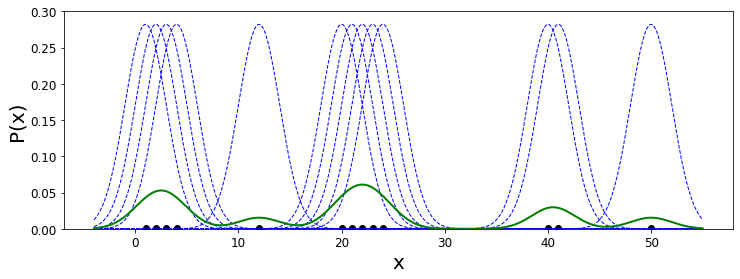

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
# gera os dados
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))
# mostra os dados
plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')

# valores x para serem usados nas densidades
X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

h=2 
fhat = 0 # estimacao obtida
for x in X:
    # distribuição normal centrada em x
    f = (1/np.sqrt(2*np.pi*h))*np.exp(-((X_plot - x)**2)/(2*h**2))
    fhat = fhat + f # acumula as distribuições
    plt.plot(X_plot,f, '--', color = 'blue', linewidth=1)

# mostra a distribuição estimada
plt.plot(X_plot,fhat/(len(X)*np.sqrt(h)), color = 'green', linewidth=2)
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0, 0.3))
plt.savefig('kernel-ex.eps')
plt.show(True)

Esse resultado pode ser obtido usando-se a função KernelDensity scikit-learn.



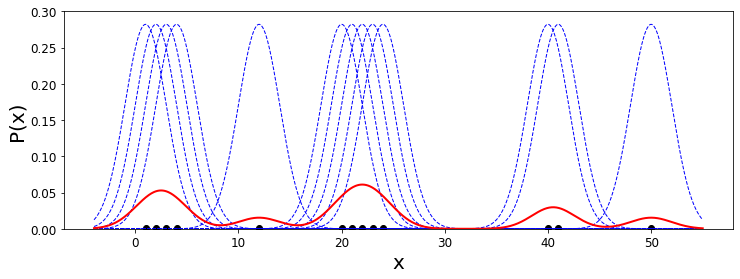

In [ ]:
import numpy as np
from matplotlib.pyplot import cm
from sklearn.neighbors import KernelDensity

color=['red', 'blue', 'magenta', 'gray', 'green']

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')

X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

h=2
fhat = 0
for x in X:
    f = (1/np.sqrt(2*np.pi*h))*np.exp(-((X_plot - x)**2)/(2*h**2))
    fhat = fhat + f
    plt.plot(X_plot,f, '--', color = 'blue', linewidth=1)

kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
plt.plot(X_plot,log_dens, color = 'red', linewidth=2, label = 'h='+str(h))    
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0, 0.3))

plt.show(True)

Notem que o formato da estimação depende do parâmetro livre h.

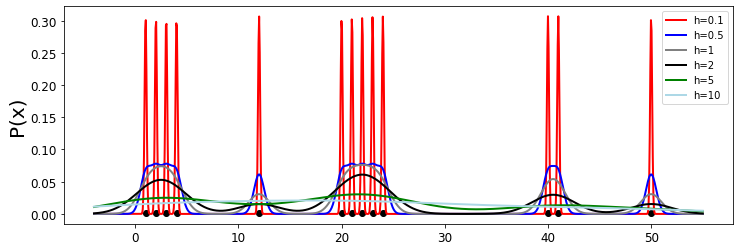

In [ ]:
import numpy as np
from matplotlib.pyplot import cm

color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
c = 0
vh = [0.1, 0.5, 1, 2, 5, 10]
for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim((0, 0.2))
plt.legend(fontsize = 10)
#plt.savefig('kernel.eps')
plt.show(True)


Notem que a estimação é relacionada com a estimação usando-se histogramas.

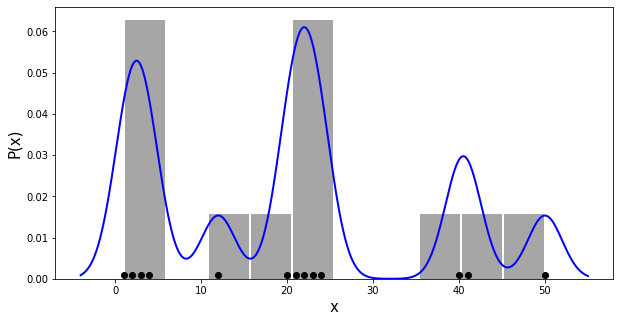

In [ ]:
import numpy as np

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

plt.figure(figsize=(10,5))
# Histogram
nbins = 10
plt.hist(X,bins = nbins, density = True, color='gray',alpha=0.7, rwidth=0.95)

#Kernel density estimation
X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(X)
log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
plt.plot(X_plot,log_dens, color = 'blue', linewidth=2)
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)

plt.show(True)


Usando o método kernel density estimation, podemos realizar a classificação

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score

random.seed(42)
#data = pd.read_csv('data/Iris.csv', header=(0))
#data = pd.read_csv('data/Vehicle.csv', header=(0))
data = pd.read_excel('/content/drive/MyDrive/wine data/wine/wiwi.xlsx', header=(0))


classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.7 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.9259259259259259
